# Data Description

The task is to train a model that can consider the data provided and predict the Average Price of Avocados. The dataset consists of 16469 rows and 14 columns.

Some relevant columns in the dataset are:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


# Importing Dataset

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

In [2]:
# Importing Dataset
df=pd.read_csv('avocado.csv')
#Visualizing first 5 rows of dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In the above Dataframe, we can see there are 13 input columns and an output column AveragePrice.

# Checking Null Values 


In [3]:
#Checking Null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are 14951 null values in all the columns i.e. 14951 rows are empty. Let us drop the empty rows.

In [4]:
#dropping all empty rows
df.dropna(axis=0,inplace=True)

In [5]:
#checking different columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
#Checking data-type of each column
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

All columns are in float data-type except date, type and region. Date, type and region are of string data-type. 

In [7]:
#Checking Null values again
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

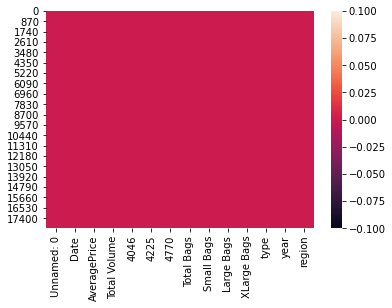

In [8]:
#Visualizing null values through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

As we can see there are no Null values present in our dataset. We can proceed forward towards Visualization.

# Making DataFrame for the Nominal Data

In [9]:
#Copying our nominal data into a new variable
df_nominal=df[['type','year','region']].copy()

In [10]:
#Checking columns of our new nominal dataframe
df_nominal.columns

Index(['type', 'year', 'region'], dtype='object')

# Visualization of Nominal Data

For the nominal categorical data we will use countplot as it will give frequency of the columns.

In [11]:
#Importing libraries required for visualization
import matplotlib.pyplot as plt
import seaborn as sns

conventional    9126
organic         9123
Name: type, dtype: int64


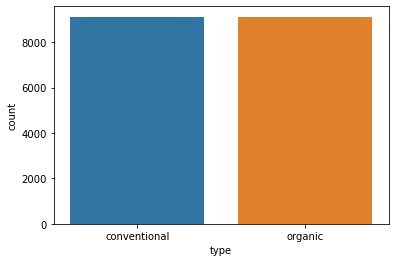

In [12]:
#Using countplot for nominal data
ab=sns.countplot(x='type', data=df_nominal)
print(df_nominal['type'].value_counts())

In [13]:
#Checking uniqueness of "type" column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

We can see that the whole dataset contains the "Conventional" type of data. Hence, it doesn't create any impact on our dataset, so we drop the column.

In [14]:
df.drop('type',axis=1,inplace=True)

In [15]:
#Checking the dropped column
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


Since we have dropped the "type" column, we move forward with our visualizations.

Boise                  338
Denver                 338
Indianapolis           338
Chicago                338
Southeast              338
Columbus               338
Syracuse               338
California             338
Pittsburgh             338
TotalUS                338
BaltimoreWashington    338
BuffaloRochester       338
West                   338
NewYork                338
Spokane                338
Plains                 338
NorthernNewEngland     338
CincinnatiDayton       338
GreatLakes             338
Seattle                338
RaleighGreensboro      338
Portland               338
Jacksonville           338
Philadelphia           338
LasVegas               338
MiamiFtLauderdale      338
Nashville              338
HartfordSpringfield    338
PhoenixTucson          338
Atlanta                338
NewOrleansMobile       338
Albany                 338
Detroit                338
Tampa                  338
StLouis                338
SouthCentral           338
Houston                338
R

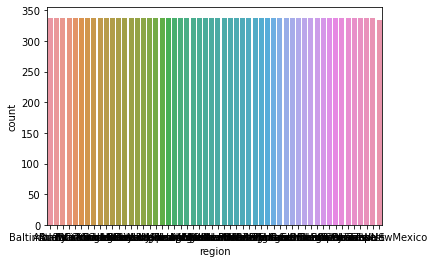

In [16]:
#Using countplot for nominal data
ab=sns.countplot(x='region', data=df_nominal)
print(df_nominal['region'].value_counts())

From the above information, we can see that most of our data is from the region California, Albany, BaltimoreWashington & Boise and least data is from the region Seattle, Southeast & LosAngeles. 

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


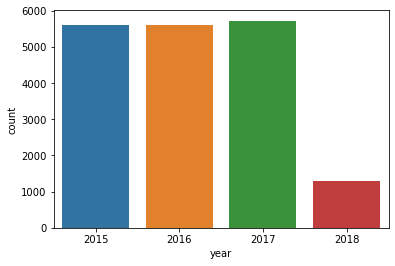

In [17]:
#Using countplot for nominal data
ab=sns.countplot(x='year', data=df_nominal)
print(df_nominal['year'].value_counts())

More than 1200 number of data belongs to the year 2015 and hardly 200 number of data belongs to the year 2016.

# Checking the distribution of the continuous value of the float type columns

In [18]:
#Copying our continuous data into a new dataframe
df_continuous=df[['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].copy()

In [19]:
#Checking columns of our new continuous dataframe
df_continuous.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

C:\Users\Kartik Jora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

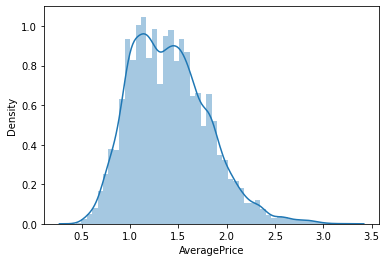

In [20]:
import seaborn as sns
sns.distplot(df['AveragePrice'],kde=True)

The AveragePrice is high between values 0.9 to 1.3 per Avocado.

C:\Users\Kartik Jora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kartik Jora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kartik Jora\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

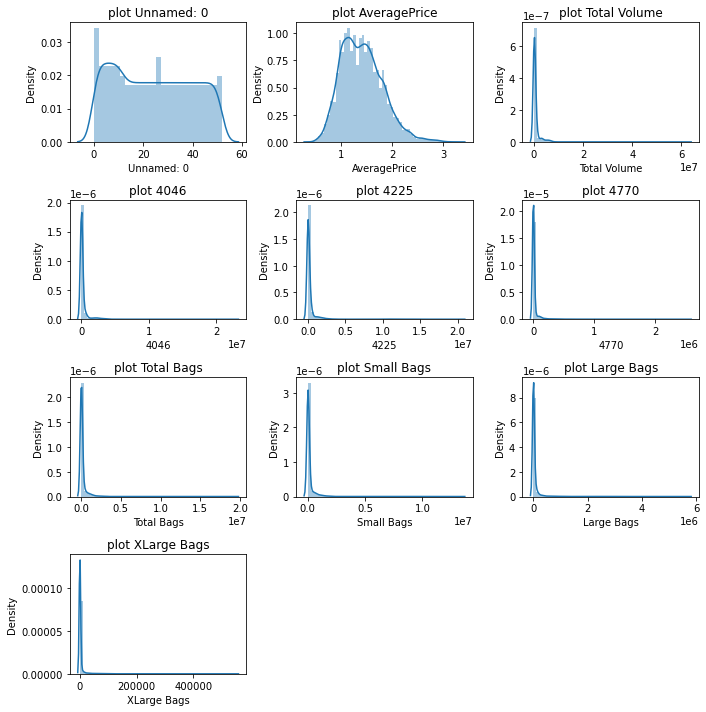

In [21]:
#Visualizing different columns using distplot
ncol,nrow=4,3
ab=df_continuous.columns.values
plt.figure(figsize=(10,10))
for index,i in enumerate(ab):
    ab=plt.subplot(ncol,nrow,index+1)
    sns.distplot(df[i])
    plt.title(f"plot {i}")
    plt.tight_layout()
plt.show()

In figure plot No.:
    The values are between 0 to 50
    
In figure plot AveragePrice:
    The values are in the range 0.5 to 2
    
In figure plot Total Volume:
    The maximum values are between 0 & 1
    
In figure plot 4046:
    Most of the values lie between values 0 to 0.5
    
In figure plot 4225:
     Most of the values lie between values 0 to 0.4
        
In figure plot 4770:
    The maximum values lie between the range 0 to 1,50,000
    
In figure plot Total Bags:
    Most values are between 0 & 500000
    
In figure plot Small Bags:
    Most values are between 0 & 600000
    
In figure plot Large Bags:
    Most values are between 0 & 300000
    
In figure plot XLarge Bags:
    Maximum number of values lie between 0 to 7000
    
Hence, we can see that there is a huge variation in values of different columns in our dataset. Therefore, we will have to standardize our data.
    
    
    


In [ ]:
#Visualizing using pairplot
sns.pairplot(df)

Observations:
    
    We cannot see relationship of any column/variable with respect to our Target Variable i.e. AveragePrice. The data is scattered in an asymmetrical manner. Hence, we cannot conclude anything out of this. Let's move forward with further analysis to find correlations between the columns.
    
    We can notice that our column 'No.' doesn't serve anything to our dataset. so, we drop the column.
    
    Also skewness in data can be seen from the above pairplot.

In [23]:
#Dropping column Unnamed: 0
df.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
#verifying the above dropped column
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


# Encoding of DataFrame

In [25]:
#Importing Library for Ordinal Encoder
#Creating an instance for Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [26]:
#Converting all object datatype values into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53.0


Our date and region column are now transformed into float values. Hence, we can move forward with analyzing data.

# Describe Data

In [28]:
#Describing shape of data
df.shape

(18249, 12)

We have 1517 rows and 12 columns in our dataset including the Target Variable.

In [29]:
#Describing present columns in our dataset
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  float64
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  year          18249 non-null  int64  
 11  region        18249 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.3 MB


All values in our data set are in float and there are no null values present.

Total number of rows present are 1517.

In [31]:
#Describing data
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,26.495644
std,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,53.000000


<AxesSubplot:>

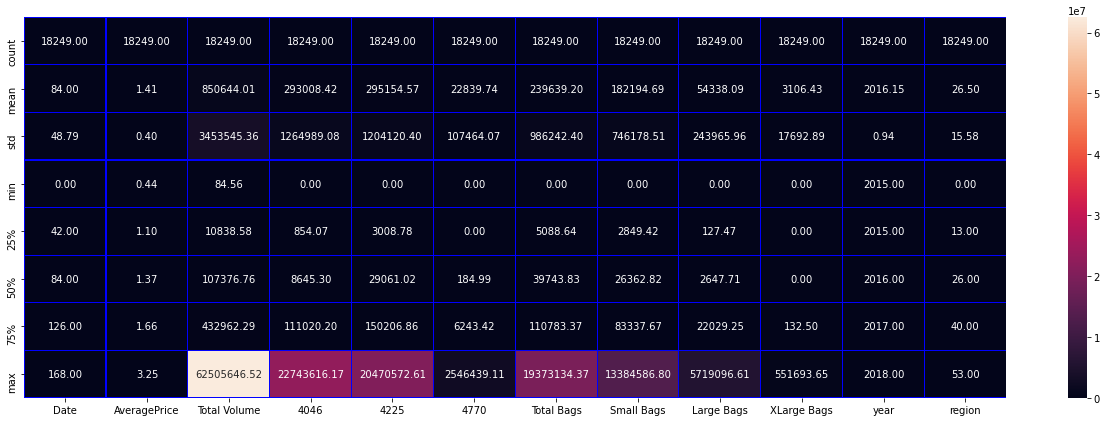

In [32]:
#Describing data with the help of Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

Observations:
    
    There is a huge variation in min & max values of each column.
    
    The standard deviation of almost every column is very high which means that the data is broadly scattered in our
    dataset.
    
    The data can also be seen going too far from their IQR range. Hence, there is a possibility of having outliers.

# Correlation of Columns with the Target Variable

In [33]:
#Describing Correlation
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.095252
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.164702
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.198768
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.082281


The data has both positive and negative correlations. Let's conclude better using Visualizing correlation.

<AxesSubplot:>

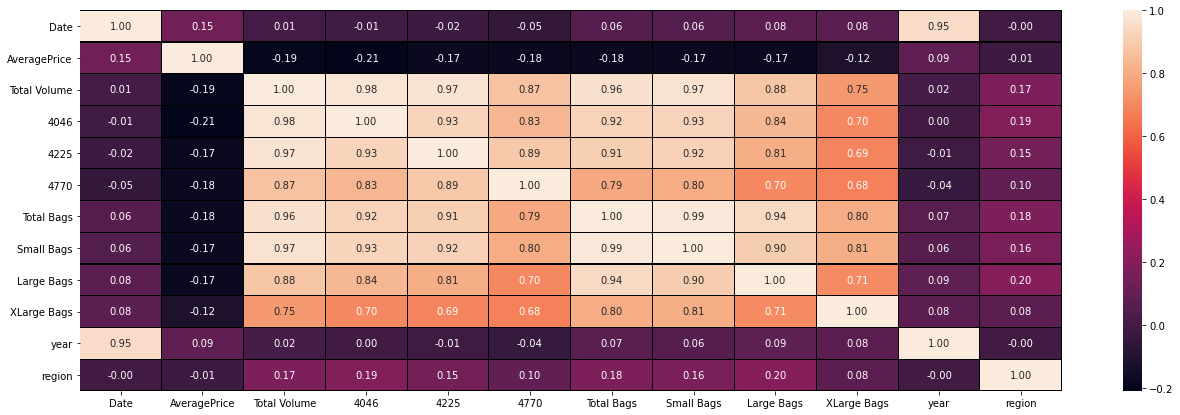

In [34]:
#Visualizing correlation
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

The positively correlated columns to the target variable are only Year and Date.

Rest all columns have negative correlation with the data.

The most positively correlated data to the target variable is Year.

The most negatively correlated data to the target variable is Region.

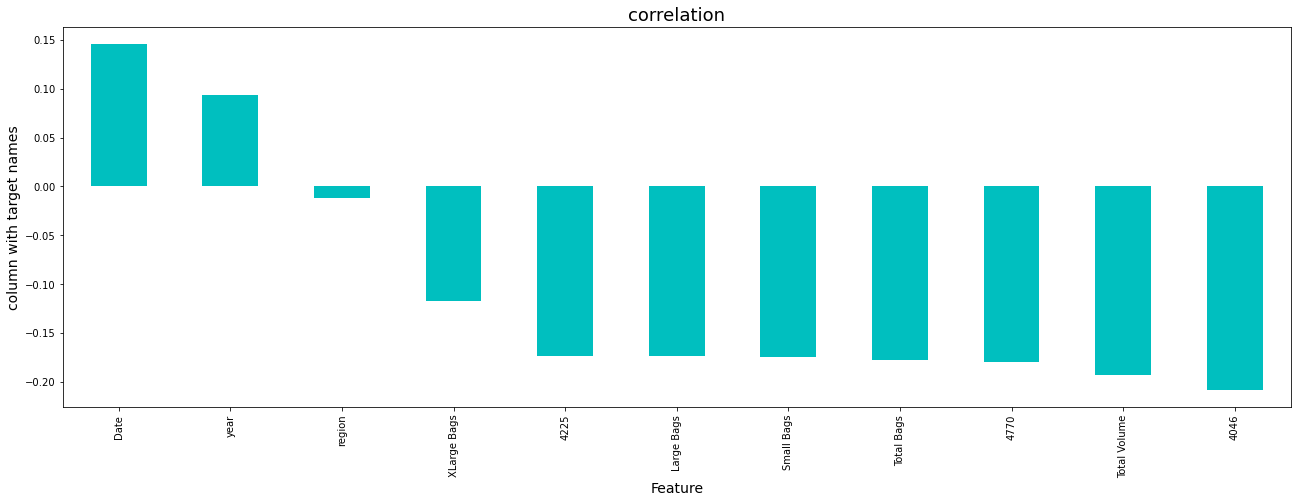

In [35]:
#Plotting correlation of columns in order with respect to the target variable
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

As we can see again that only year and date columns are positively correlated to the target variable, rest all columns are negatively correlated.

# Checking Skewness

In [36]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
region           0.000030
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, we can see that almost all data except for the year and date are highly skewed. Let's first try finding outliers in data.


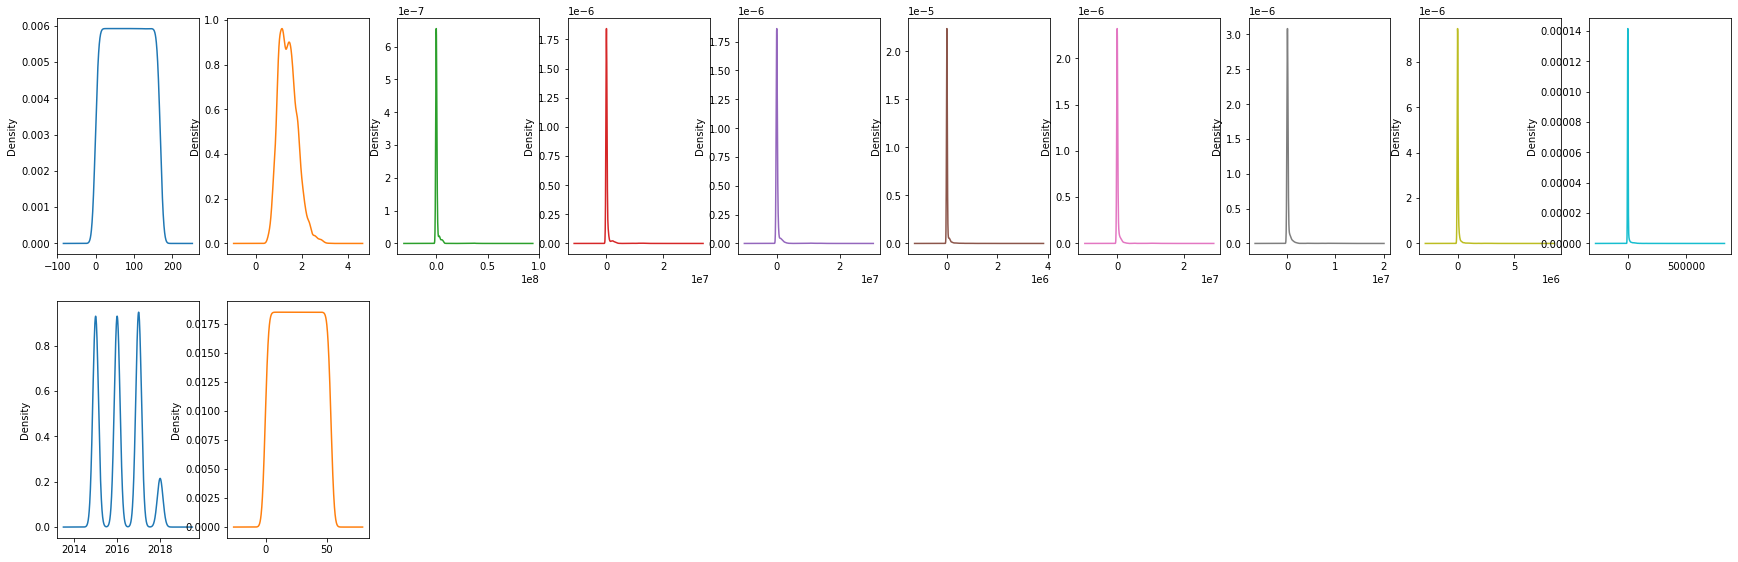

In [37]:
#Visualizing skewness on density graph
#Example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(4,10),legend=False,sharex=False,figsize=(30,20))
plt.show()

It is easily observed from the above graph that the data is highly skewed. The skewness needs to be reduced.

# Checking Outliers

In [38]:
#Checking datatype of data in each column 
df.dtypes

Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region          float64
dtype: object

All values are in float datatype.

<AxesSubplot:>

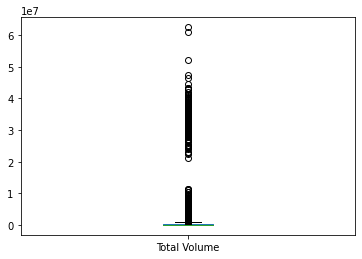

In [39]:
df['Total Volume'].plot.box()

There are too many outliers present in 'Total Volume'

<AxesSubplot:>

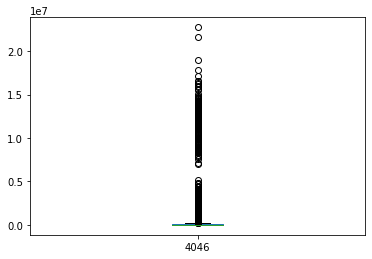

In [40]:
df['4046'].plot.box()

Too many outliers can be observed in the '4046' column

Date                AxesSubplot(0.125,0.71587;0.0824468x0.16413)
AveragePrice     AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Total Volume     AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
4046             AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
4225             AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
4770             AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Total Bags       AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
Small Bags       AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Large Bags         AxesSubplot(0.125,0.518913;0.0824468x0.16413)
XLarge Bags     AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
year            AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
region          AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
dtype: object

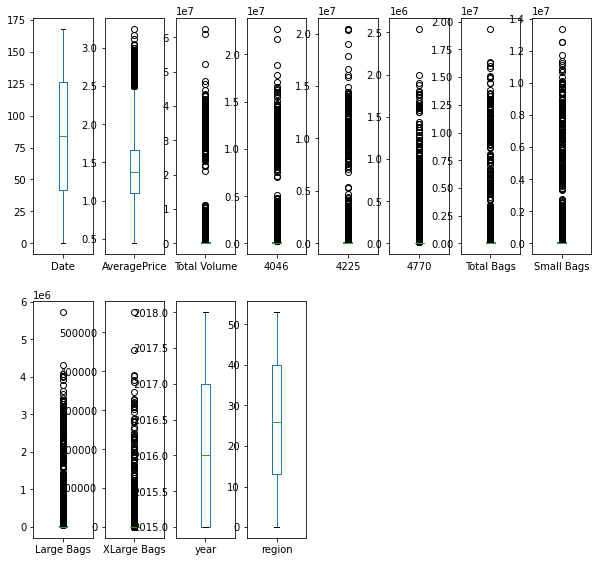

In [41]:
#Multivariate analysis to check outliers of all columns
df.plot(kind='box',subplots=True,layout=(4,8),figsize=(10,20))

No outliers present in column Date, year & Region

Too many outliers present in all the other columns. So we will remove the outliers present to make our data work efficiently.



# Resolving Outliers

In [42]:
#removing outliers
from scipy.stats import zscore 
z=np.abs(zscore(df))
z

array([[0.67635986, 0.18868864, 0.22771641, ..., 0.17557961, 1.22128204,
        1.7002522 ],
       [0.69685742, 0.13901962, 0.23042664, ..., 0.17557961, 1.22128204,
        1.7002522 ],
       [0.71735497, 1.18206895, 0.21208462, ..., 0.17557961, 1.22128204,
        1.7002522 ],
       ...,
       [1.53737632, 1.15237477, 0.24233073, ..., 0.17557961, 1.97050371,
        1.70081131],
       [1.51687877, 1.30138182, 0.24162464, ..., 0.17557961, 1.97050371,
        1.70081131],
       [1.49638121, 0.53151208, 0.24125273, ..., 0.17557961, 1.97050371,
        1.70081131]])

In [43]:
#Setting threshold values to remove outliers
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 9, ..., 1, 1, 1], dtype=int64))


In [44]:
#Removing all values more than 3(threshold value)
df_new=df[(z<3).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53.0


In [45]:
#checking shape of original data
df.shape

(18249, 12)

In [46]:
#Checking shape of new data
df_new.shape

(17651, 12)

# Calculating Data Loss

In [47]:
#Using formula to calculate data loss
data_loss=((1517-1439)/1517)*100

In [48]:
data_loss

5.1417270929466055

The lost data is around 5.14. Now we can use our new data efficiently for better performance.

# Separating the column into x & y

In [49]:
#Creating x & y columns 
x=df_new.drop('AveragePrice',axis=1)
y=df_new['AveragePrice']

The data is now divided into input features and Target Variable

# Transforming data to reduce Skewness

In [50]:
#Using power transform to remove skewness
from sklearn.preprocessing import power_transform
import warnings
warnings.filterwarnings('ignore')
x=power_transform(x,method='yeo-johnson')

In [51]:
x

array([[-0.56745717, -0.07532391, -0.65742071, ..., -0.67791909,
        -1.2106467 , -2.01058988],
       [-0.58972681, -0.14749743, -0.77717852, ..., -0.67791909,
        -1.2106467 , -2.01058988],
       [-0.61212554,  0.20555557, -0.7317763 , ..., -0.67791909,
        -1.2106467 , -2.01058988],
       ...,
       [ 1.41245946, -0.77527398, -0.61796649, ..., -0.67791909,
         1.97870686,  1.57828237],
       [ 1.39650072, -0.70179733, -0.54701087, ..., -0.67791909,
         1.97870686,  1.57828237],
       [ 1.38051236, -0.66738095, -0.35967077, ..., -0.67791909,
         1.97870686,  1.57828237]])

The above arrays have been transformed and the skewness has been reduced.

# Scaling Data using Standard Scaler

In [52]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler

In [53]:
#Scaling our data to improve model performance
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.56745717, -0.07532391, -0.65742071, ..., -0.67791909,
        -1.21061818, -2.01058988],
       [-0.58972681, -0.14749743, -0.77717852, ..., -0.67791909,
        -1.21061818, -2.01058988],
       [-0.61212554,  0.20555557, -0.7317763 , ..., -0.67791909,
        -1.21061818, -2.01058988],
       ...,
       [ 1.41245946, -0.77527398, -0.61796649, ..., -0.67791909,
         1.97873539,  1.57828237],
       [ 1.39650072, -0.70179733, -0.54701087, ..., -0.67791909,
         1.97873539,  1.57828237],
       [ 1.38051236, -0.66738095, -0.35967077, ..., -0.67791909,
         1.97873539,  1.57828237]])

We have now scaled our x data

# Model Building

In [54]:
#Importing libraries required for model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Since the output has continuous type of values, we use Linear Regression.

In [55]:
#Finding random state that gives us best accuracy
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.49075484455586094
At random state 0, the testing accuracy is: 0.4882737733215984


At random state 1, the training accuracy is: 0.4897499880546786
At random state 1, the testing accuracy is: 0.49231084344656606


At random state 2, the training accuracy is: 0.49539618627671234
At random state 2, the testing accuracy is: 0.4695947663002106


At random state 3, the training accuracy is: 0.48764782168382825
At random state 3, the testing accuracy is: 0.5009275160175938


At random state 4, the training accuracy is: 0.488115588481962
At random state 4, the testing accuracy is: 0.49927156558273


At random state 5, the training accuracy is: 0.48629600640031156
At random state 5, the testing accuracy is: 0.5053689128978569


At random state 6, the training accuracy is: 0.4870244341511859
At random state 6, the testing accuracy is: 0.5029263956741161


At random state 7, the training accuracy is: 0.48890180243517956
At random state 7, the testing

At random state 75, the testing accuracy is best at 43.33% 

# Splitting DataFrame into x & y

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=75)

Splitting our model into x & y with train data(x) 80% and test data(y) 20% at random state 75

# Using Linear Regression for Model Building

In [57]:
#Performing Linear Regression
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Predicted W: ",pred)
print('actual W: ',y_test)

Predicted W:  [1.33320507 1.01720596 1.43011815 ... 1.42768076 1.66081044 1.21276911]
actual W:  9742     1.38
3406     0.85
16279    1.67
12196    1.88
8027     0.92
         ... 
11080    1.60
16725    1.95
9720     1.14
13389    2.17
6583     1.29
Name: AveragePrice, Length: 3531, dtype: float64


We can see there is a difference between the Predicted and the actual values. So, we will find the error rate of our model.

In [58]:
#Finding coefficient
lm.coef_

array([ 0.16697162, -0.45970076,  0.02846477,  0.29355344, -0.02750723,
       -0.20773805,  0.21261294, -0.02869449, -0.03799525, -0.07013194,
        0.0219655 ])

In [59]:
#Finding intercept
lm.intercept_

1.4070868887078336

In [60]:
#training score
lm.score(x_train,y_train)

0.4907266856061988

Our training accuracy is 28.74%

In [61]:
#finding errors in our Model
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.21948112357339183
Mean squared error: 0.07649307696070466
Root Mean squared error: 0.2765738182849285


We can observe quite a few errors in our model. In order to reduce the errors and increase efficiency and performance of the model, we will hypertune our model.

In [62]:
#Testing accuracy of the model
print(r2_score(y_test,pred))

0.48863415520984


Testing accuracy of the model is 43.33%. To increase accuracy, let's hypertune the model.

In [63]:
#importing library for cross Validation
from sklearn.model_selection import cross_val_score

In [64]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is -2.9580103154814754 and accuracy score for training is -0.5332665541808377 and accuracy for the testing is -0.5003984178915613


At cross fold 3 the cv score is -0.2831261329573422 and accuracy score for training is -0.5332665541808377 and accuracy for the testing is -0.5003984178915613


At cross fold 4 the cv score is -0.1326158870435739 and accuracy score for training is -0.5332665541808377 and accuracy for the testing is -0.5003984178915613


At cross fold 5 the cv score is -0.016733800822363885 and accuracy score for training is -0.5332665541808377 and accuracy for the testing is -0.5003984178915613


At cross fold 6 the cv score is -0.09861516486036219 and accuracy score for training is -0.5332665541808377 and accuracy for the testing is -0.5003984178915613


At cross fold 7 the cv score is -0.03249371042113315 and accuracy score for training is -0.5332665541808377 and accuracy for the testing is -0.5003984178915613


At cross fold 8 the cv score i

Since we get maximum accuracy at cv 3 i.e. 19.06%. So cv=3 is selected.

# Regularization

In [65]:
#Importing libraries for Regularization

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [66]:
#Finding best Parameters for Lasso Regression

from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [67]:
#Performing Lasso Regression

ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.4871808919031074

The r2 score of Lasso Regression is 43%

In [68]:
cv_score=cross_val_score(ls,x,y,cv=3)
cv_mean=cv_score.mean()
cv_mean

-0.28831066284459356

The cv score is 19.90%

# Ensemble Technique

In [ ]:
#Importing libraries and finding best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [71]:
#Performing RandomForestRegressor

rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 score: ',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=3)
rfc=rfscore.mean()
print("Cross Val Score: ",rfc*100)

R2 score:  89.37795830823676
Cross Val Score:  11.568432262261512


The r2 score & Cross Val Score after performing RandomForestRegressor is 75.12% & 14.62% respectively.

# Saving Model

In [72]:
import pickle
filename='avocado.pkl'
pickle.dump(rf,open(filename,'wb'))